In [1]:
#Importing the required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization, Dropout

In [2]:
# Load the drone cloud pattern data
training_data=pd.read_csv(r"C:\\Muskan\train.csv")

In [3]:
#First few rows of training dataset
training_data.head(5)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [4]:
#Preprocessing of the data
training_data['Label'] = training_data.Image_Label.str.split('_').str[1]

In [5]:
#Removing EncodedPixels which have null values
training_data = training_data.dropna(subset=['EncodedPixels'])

In [6]:
#Creating the independent and the dependent datasets
training_data['Image'] = training_data.Image_Label.str.split('_').str[0]
training_data['Label'] = training_data.Image_Label.str.split('_').str[1]

In [7]:
#Viewing 1st few rows 
training_data.head(5)

,Image_Label,EncodedPixels,Label,Image
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,Fish,0011165.jpg
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower,0011165.jpg
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,Fish,002be4f.jpg
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...,Flower,002be4f.jpg
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...,Sugar,002be4f.jpg


In [8]:
#Forming training data and validation data
training_image, validation_image, training_label, validation_label = train_test_split(
    training_data['Image'],
    training_data['Label'],
    random_state=5,
    test_size=0.20
)

In [9]:
#Generating the training and validation images
training_img_gnrtr = ImageDataGenerator(rescale=1./255, zoom_range=0.10,rotation_range=25)
validation_img_gnrtr = ImageDataGenerator(rescale=1./255)

In [10]:
# Creating the validation data
validation_data = pd.DataFrame({
    'Image': validation_image,
    'Label': validation_label
})

In [11]:
#Training images location
training_location='C://Muskan/train_images/'

In [16]:
# Extracting the images to create training image data
training_images_data = training_img_gnrtr.flow_from_dataframe(
    dataframe=training_data,
    directory=training_location,
    x_col='Image',
    batch_size=32,
    y_col='Label',
    target_size=(256, 256),
    class_mode='categorical'
)

Found 9965 validated image filenames belonging to 4 classes.


C:\Users\alekh\anaconda3\envs\RTutorial\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 1871 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


In [13]:
#Extracting the images to create validation image data
validation_images_data = validation_img_gnrtr.flow_from_dataframe(
    dataframe=validation_data,
    directory=training_location,
    x_col='Image',
    batch_size=32,
    y_col='Label',
    target_size=(256, 256),
    class_mode='categorical'
)

Found 2010 validated image filenames belonging to 4 classes.


C:\Users\alekh\anaconda3\envs\RTutorial\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 358 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


In [19]:
#CNN model architecture
drone_cloud_model = Sequential()
drone_cloud_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
drone_cloud_model.add(BatchNormalization())
drone_cloud_model.add(Dropout(0.40))
drone_cloud_model.add(MaxPooling2D((2, 2)))
drone_cloud_model.add(Conv2D(64, (3, 3), activation='relu'))
drone_cloud_model.add(BatchNormalization())
drone_cloud_model.add(Dropout(0.40))
drone_cloud_model.add(MaxPooling2D((2, 2)))
drone_cloud_model.add(Conv2D(128, (3, 3), activation='relu'))
drone_cloud_model.add(Dropout(0.40))
drone_cloud_model.add(MaxPooling2D((2, 2)))
drone_cloud_model.add(Conv2D(256, (3, 3), activation='relu'))
drone_cloud_model.add(BatchNormalization())
drone_cloud_model.add(Dropout(0.40))
drone_cloud_model.add(MaxPooling2D((2, 2)))
drone_cloud_model.add(Flatten())
drone_cloud_model.add(Dense(512, activation='relu'))
drone_cloud_model.add(Dropout(0.40))
drone_cloud_model.add(Dense(256, activation='relu'))
drone_cloud_model.add(Dropout(0.40))
drone_cloud_model.add(Dense(4, activation='softmax'))

In [20]:
#Compiling step for the CNN model
drone_cloud_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
# Training the drone cloud patter analysis CNN model
history = drone_cloud_model.fit(training_images_data, epochs=3, validation_data=validation_images_data)

Epoch 1/3
7/7 [==============================] - 41s 6s/step - loss: 26.9718 - accuracy: 0.2642 - val_loss: 2.9174 - val_accuracy: 0.1818
Epoch 2/3
7/7 [==============================] - 35s 5s/step - loss: 21.1089 - accuracy: 0.2383 - val_loss: 11.8557 - val_accuracy: 0.2045
Epoch 3/3
7/7 [==============================] - 37s 5s/step - loss: 12.4630 - accuracy: 0.3005 - val_loss: 26.7966 - val_accuracy: 0.2273


Text(0.5, 0, 'Epoches Count')

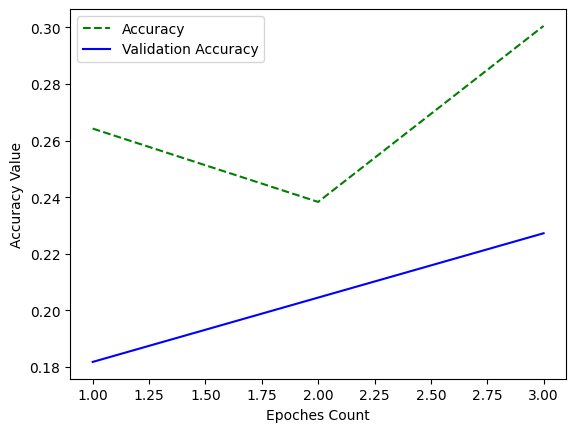

In [28]:
#Accuracy and Validation accuracy visualisation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
traing_loss = history.history['loss']
epochs = range(1, len(traing_loss) + 1)
plt.plot(epochs, acc, 'g--')
plt.plot(epochs, val_acc, 'b-')
plt.legend(['Accuracy','Validation Accuracy'])
plt.ylabel('Accuracy Value')
plt.xlabel('Epoches Count')

Text(0.5, 0, 'Epoches Count')

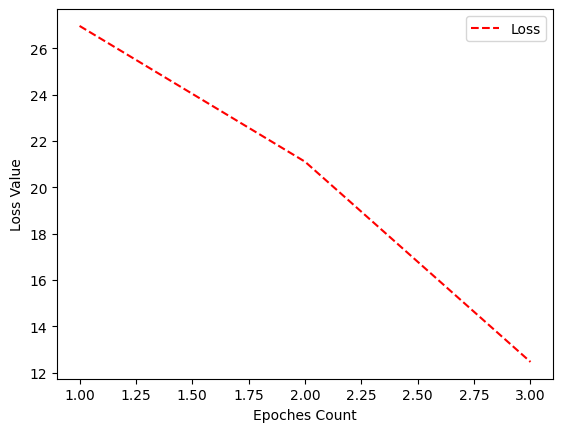

In [30]:
#Loss visualisation
traing_loss = history.history['loss']
epochs = range(1, len(traing_loss) + 1)
plt.plot(epochs, traing_loss, 'r--')
plt.ylabel('Loss Value')
plt.legend(['Loss'])
plt.xlabel('Epoches Count')